In [1]:
## Import Libraries 
import numpy as np      # for array operations
import pandas as pd     # for reading data operations
import os
from keras.preprocessing.text import Tokenizer          # for tokenizing text
from keras.preprocessing.sequence import pad_sequences  # for padding sentences with zeros. To make the sentence length same
from keras.utils import to_categorical                  # for one-hot encoding of the labels
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
## Define the sequence lengths, max number of words and embedding dimensions
MAX_SEQUENCE_LENGTH = 463   # Sequence length of each sentence. If more, crop. If less, pad with zeros
MAX_NB_WORDS = 40000        # unique words|

In [4]:
##Loading data using Panda

train = pd.read_csv('train.csv',encoding='utf8')
test = pd.read_csv('test.csv', encoding='utf8')
train.converse=train.converse.astype(str)
test.converse=test.converse.astype(str)
train.head()

,categories,converse
0,QUERIES FROM PHARMACY,please to verify instructions for drugname pat...
1,NEW APPOINTMENT,lmovm for patients mother to and schd rov trac...
2,OTHERS,labtype and insurance approval other incoming ...
3,OTHERS,clinical list changes medfusion secure electro...
4,MEDICATION RELATED,wants to wean off medication work phone name d...


In [5]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)   # get the frequently occuring words
tokenizer.fit_on_texts(train.converse)           
train_sequences = tokenizer.texts_to_sequences(train.converse)
test_sequences = tokenizer.texts_to_sequences(test.converse)

word_index = tokenizer.word_index               # dictionary containing words and their index
# print(tokenizer.word_index)                   # print to check
print('Found %s unique tokens.' % len(word_index)) # total words in the corpus
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH) # get only the top frequent words on train
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)   # get only the top frequent words on test

print(train_data.shape)
print(test_data.shape)

Found 35747 unique tokens.
(48699, 463)
(8581, 463)


In [6]:
print(word_index)

{'therapistpsychiatrist': 21601, 'karijohnb': 33713, 'askew': 22277, 'woods': 5859, 'clotted': 22126, 'hanging': 6309, 'francesca': 11618, 'testingprocedures': 23274, 'paphone': 34507, 'localized': 7301, 'studytreatment': 35720, 'sevens': 18531, 'canes': 25254, 'lisaloflin': 24992, 'chatter': 29240, 'scold': 35113, 'noncaseating': 35660, 'relpaxfrova': 26058, 'imidate': 30893, 'taicox': 33446, 'canel': 13721, 'discribed': 34674, 'trileptal': 767, 'antoher': 17978, 'bringing': 2998, 'discribes': 15525, 'advices': 15862, 'spacy': 30919, 'wooden': 11083, 'radiofrequencies': 33722, 'wednesday': 2398, 'gonzolales': 31974, 'asamg': 33880, 'stereotypical': 15536, 'churland': 30555, 'mdpultracet': 30591, 'patinets': 26008, 'asssumes': 30636, 'alzhiemers': 32660, 'soots': 12357, 'approvin': 30931, 'gorman': 30390, 'woody': 13676, 'scraped': 25636, 'errors': 8262, 'semicircular': 10100, 'tiered': 34876, 'trasfusion': 20456, 'aggronox': 35028, 'shocky': 23479, 'hallucinating': 3998, 'almands': 17

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()                  # converts the character array to numeric array. Assigns levels to unique labels.
le.fit(train.categories)
train_labels = le.transform(train.categories)

print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(train_data.shape)
#print(xtrain.shape)
#print(xvalid.shape)

[u'CANCELLATION' u'CHANGE OF HOSPITAL' u'CHANGE OF PHARMACY'
 u'CHANGE OF PROVIDER' u'FOLLOW UP ON PREVIOUS REQUEST' u'JUNK'
 u'LAB RESULTS' u'MEDICATION RELATED' u'NEW APPOINTMENT' u'OTHERS'
 u'PRIOR AUTHORIZATION' u'PROVIDER' u'QUERIES FROM INSURANCE FIRM'
 u'QUERIES FROM PHARMACY' u'QUERY ON CURRENT APPOINTMENT' u'REFILL'
 u'RESCHEDULING' u'RUNNING LATE TO APPOINTMENT'
 u'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)'
 u'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)' u'SYMPTOMS']
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), array([ 564,  127,   47,  811,  304,   18, 2253, 9010, 8907, 6253, 1043,
       1677,   91, 1464,  559, 8347, 1383,  590, 3018, 1212, 1021]))
(48699, 463)


In [9]:
labels_train = to_categorical(np.asarray(train_labels))
#labels_val = to_categorical(np.asarray(yvalid))
print('Shape of data tensor:', train_data.shape)

print(labels_train.shape)#print('Shape of label tensor:', labels_train.shape)
#print('Shape of label tensor:', labels_val.shape)

('Shape of data tensor:', (48699, 463))
(48699, 21)


In [27]:
print('Training model.')

mlp = Sequential()
mlp.add(Dense(463, activation='relu',input_shape=(463,)))
mlp.add(Dropout(0.5))
mlp.add(Dense(1280, activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(640, activation='relu'))
mlp.add(Dropout(0.17))
mlp.add(Dense(320, activation='relu'))
mlp.add(Dropout(0.1))
mlp.add(Dense(160, activation='relu'))
mlp.add(Dropout(0.03))
mlp.add(Dense(21, activation='softmax'))
mlp.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint 
checkpoint = ModelCheckpoint("model_deep_mlp.h5", save_best_only=True)
callbacks_list = [checkpoint]


Training model.


In [29]:
deep_hist = mlp.fit(train_data, labels_train, validation_split=0.2, epochs=100, batch_size=64)


Train on 38959 samples, validate on 9740 samples
Epoch 1/100
38959/38959 [==============================] - 24s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 2/100
38959/38959 [==============================] - 24s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 3/100
38959/38959 [==============================] - 25s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 4/100
38959/38959 [==============================] - 24s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 5/100
38959/38959 [==============================] - 25s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 6/100
38959/38959 [==============================] - 24s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 7/100
38959/38959 [==============================] - 24s - loss: 13.1526 - acc: 0.1840 - val_loss: 13.2403 - val_acc: 0.1785
Epoch 8/100
38959/38959 [=========

In [35]:

mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_23 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1000)              301000    
_________________________________________________________________
dropout_24 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 21)                21021     
Total params: 1,323,021
Trainable params: 1,323,021
Non-trainable params: 0
_________________________________________________________________


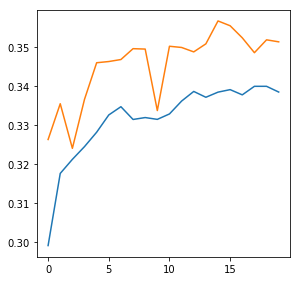

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(deep_hist['acc'])
plt.plot(deep_hist['val_acc'])

In [38]:
predict = mlp.predict_classes(test_data)
np.savetxt("PredictTestMLP.csv", predict, delimiter=",")